# ✅ ARMA(p, q) 모델을 활용한 테슬라 주가 예측

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


📌 Training MSE: 90.0635, R²: 0.9754
📌 Test MSE: 595.4997, R²: -0.9614


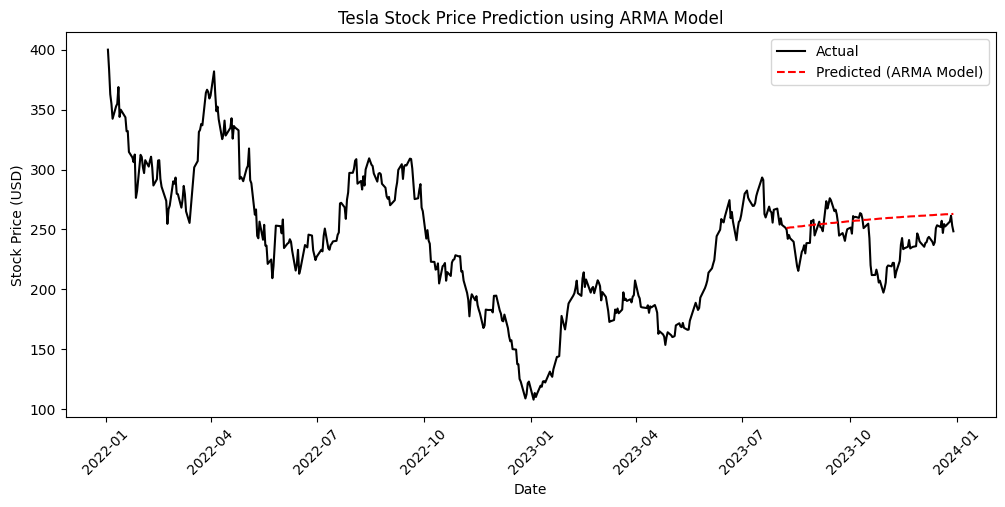

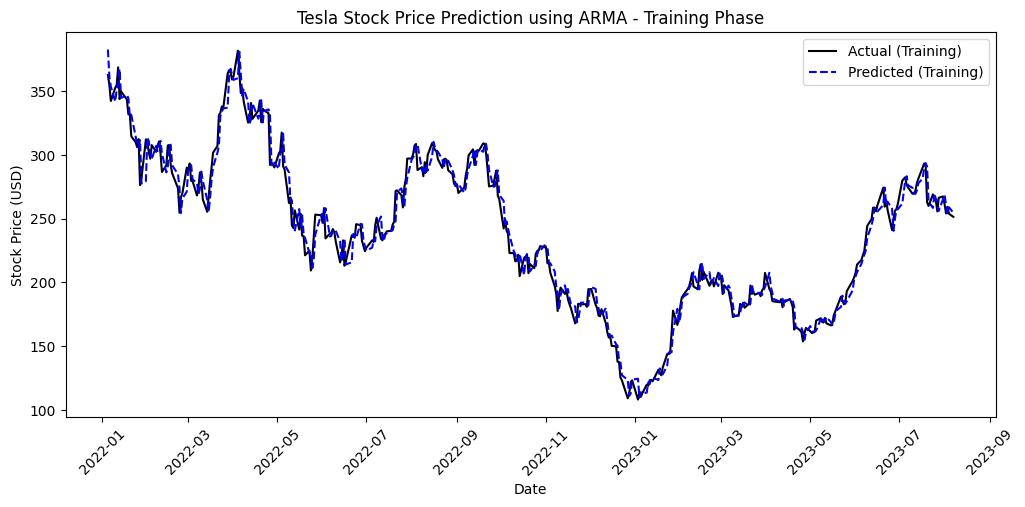

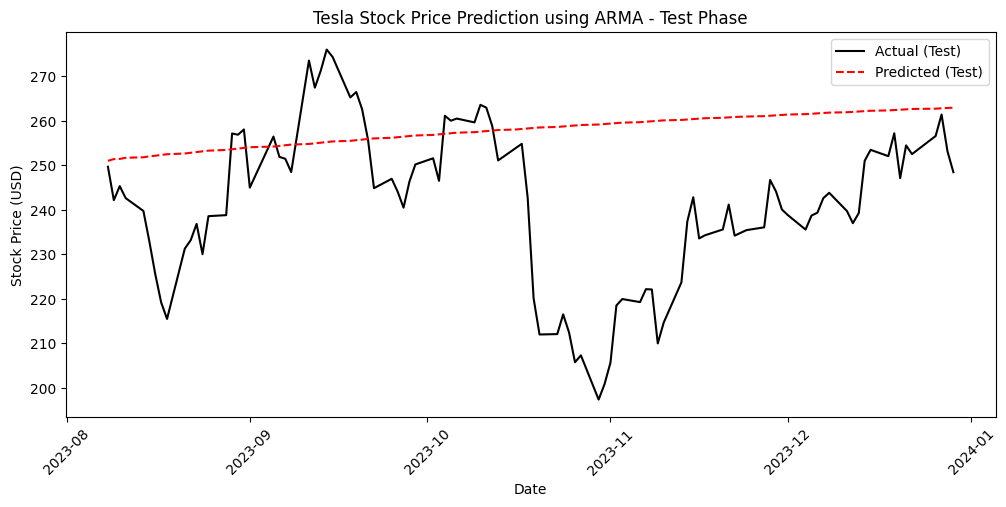

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")

# 데이터프레임 변환
df = df.reset_index()

# 📌 2️⃣ 학습 및 테스트 데이터 분할 (80% 학습, 20% 테스트)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size].copy(), df.iloc[train_size:].copy()  # ✅ `.copy()` 추가

# 📌 3️⃣ ARMA(p, q) 모델 설정
p = 2  # AR 차수 (과거 데이터 반영 개수)
q = 2  # MA 차수 (과거 오차 반영 개수)

# 📌 4️⃣ ARMA 모델 학습
model = ARIMA(train["Close"], order=(p, 0, q))  # 차분(d=0) 사용하여 ARMA 모델 구축
model_fit = model.fit()

# 📌 5️⃣ 예측 수행
train_pred = model_fit.predict(start=p, end=len(train) - 1)  # 훈련 데이터 예측
test_pred = model_fit.predict(start=len(train), end=len(df) - 1)  # 테스트 데이터 예측

# 📌 6️⃣ 성능 평가
train_actual = train["Close"][p:]  # 실제값
test_actual = test["Close"]

train_mse = mean_squared_error(train_actual, train_pred)
test_mse = mean_squared_error(test_actual, test_pred)
train_r2 = r2_score(train_actual, train_pred)
test_r2 = r2_score(test_actual, test_pred)

print(f"📌 Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"📌 Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# 📌 7️⃣ 결과 시각화 (전체 데이터 예측)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Close"], label="Actual", color="black")
plt.plot(test["Date"], test_pred, label="Predicted (ARMA Model)", linestyle="--", color="red")
plt.title("Tesla Stock Price Prediction using ARMA Model")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 8️⃣ 결과 시각화 (훈련 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(train["Date"][p:], train_actual, label="Actual (Training)", color="black")
plt.plot(train["Date"][p:], train_pred, label="Predicted (Training)", color="blue", linestyle="--")
plt.title("Tesla Stock Price Prediction using ARMA - Training Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 9️⃣ 결과 시각화 (테스트 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(test["Date"], test_actual, label="Actual (Test)", color="black")
plt.plot(test["Date"], test_pred, label="Predicted (Test)", linestyle="--", color="red")
plt.title("Tesla Stock Price Prediction using ARMA - Test Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


# 📌 1️⃣ 최적의 𝑝 ,𝑞 값 찾기 및 시각화 코드

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/loc

✅ 최적의 (p, q) 값: (p=5, q=3)


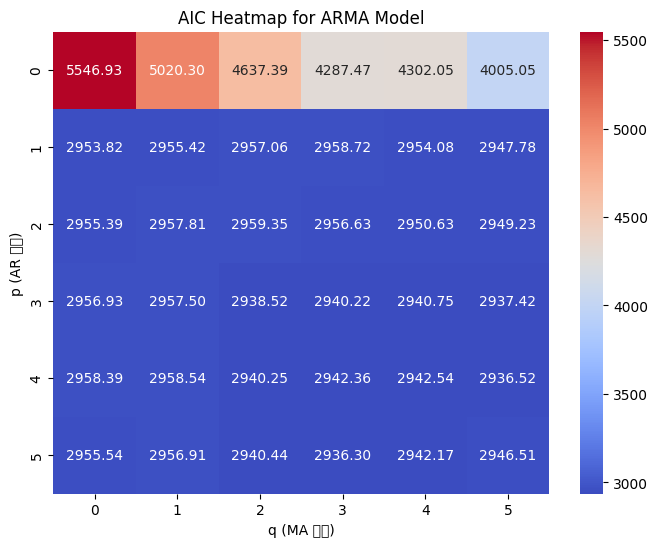

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import arma_order_select_ic

# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")

# 데이터프레임 변환
df = df.reset_index()

# 📌 2️⃣ 종가 데이터만 추출
train_size = int(len(df) * 0.8)  # 80% 학습 데이터
train = df["Close"][:train_size]

# 📌 3️⃣ 최적의 (p, q) 값 찾기 (AIC 기준)
pq_selection = arma_order_select_ic(train, max_ar=5, max_ma=5, ic='aic', trend='n')
best_p, best_q = pq_selection.aic_min_order

# 📌 4️⃣ 결과 출력
print(f"✅ 최적의 (p, q) 값: (p={best_p}, q={best_q})")

# 📌 5️⃣ AIC 결과를 시각화
aic_matrix = pq_selection.aic  # AIC 값 행렬
plt.figure(figsize=(8, 6))
sns.heatmap(aic_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=range(aic_matrix.shape[1]), yticklabels=range(aic_matrix.shape[0]))
plt.xlabel("q (MA 차수)")
plt.ylabel("p (AR 차수)")
plt.title("AIC Heatmap for ARMA Model")
plt.show()


# ✅ 최적의 (𝑝,𝑞) 값 찾기 + ARMA 모델 적용 코드

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/loc

✅ 최적의 (p, q) 값: (p=5, q=3)


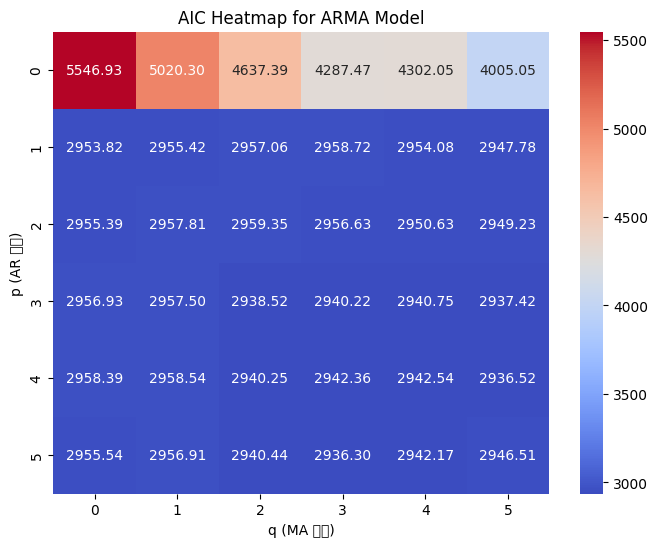

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


📌 Training MSE: 84.3971, R²: 0.9765
📌 Test MSE: 329.6296, R²: -0.0857


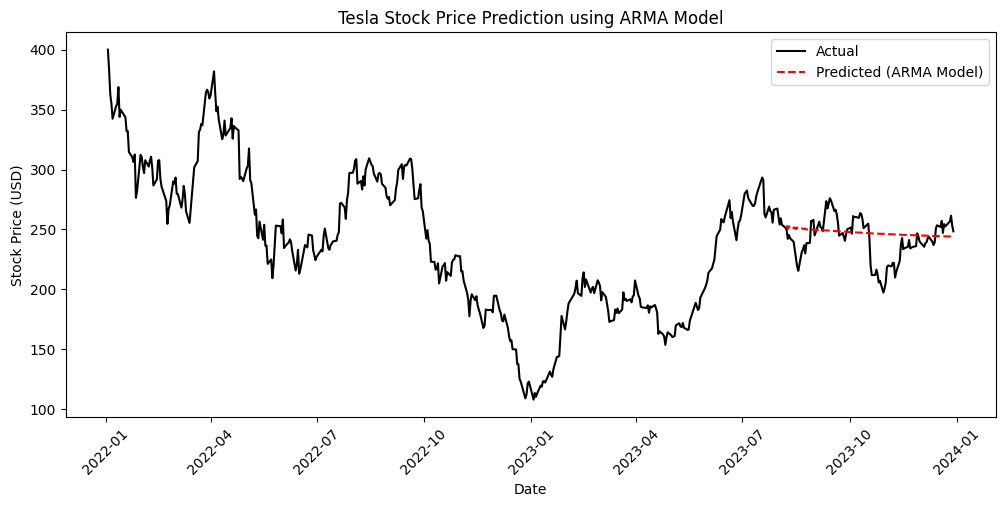

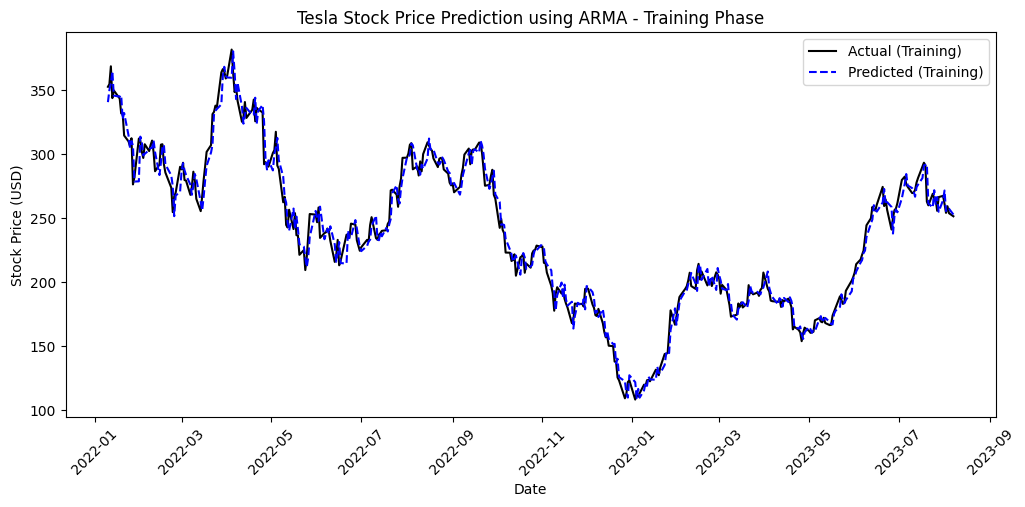

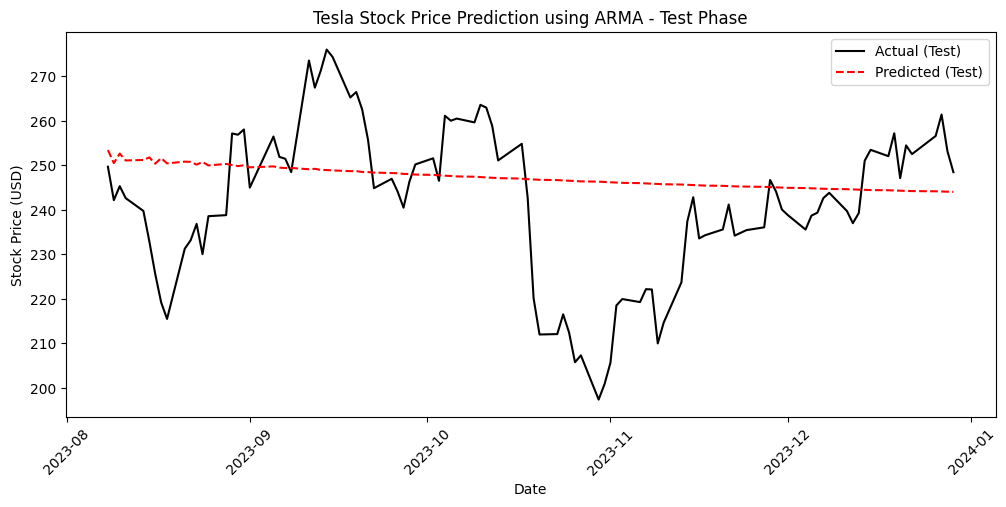

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")

# 데이터프레임 변환
df = df.reset_index()

# 📌 2️⃣ 학습 및 테스트 데이터 분할 (80% 학습, 20% 테스트)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size].copy(), df.iloc[train_size:].copy()  # ✅ `.copy()` 추가

# 📌 3️⃣ 최적의 (p, q) 값 찾기 (AIC 기준)
pq_selection = arma_order_select_ic(train["Close"], max_ar=5, max_ma=5, ic='aic', trend='n')
best_p, best_q = pq_selection.aic_min_order

# 📌 4️⃣ 결과 출력
print(f"✅ 최적의 (p, q) 값: (p={best_p}, q={best_q})")

# 📌 5️⃣ AIC 결과를 시각화
aic_matrix = pq_selection.aic  # AIC 값 행렬
plt.figure(figsize=(8, 6))
sns.heatmap(aic_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=range(aic_matrix.shape[1]), yticklabels=range(aic_matrix.shape[0]))
plt.xlabel("q (MA 차수)")
plt.ylabel("p (AR 차수)")
plt.title("AIC Heatmap for ARMA Model")
plt.show()

# 📌 6️⃣ 최적의 (p, q) 값으로 ARMA 모델 학습
model = ARIMA(train["Close"], order=(best_p, 0, best_q))  # 차분(d=0) 사용하여 ARMA 모델 구축
model_fit = model.fit()

# 📌 7️⃣ 예측 수행
train_pred = model_fit.predict(start=best_p, end=len(train) - 1)  # 훈련 데이터 예측
test_pred = model_fit.predict(start=len(train), end=len(df) - 1)  # 테스트 데이터 예측

# 📌 8️⃣ 성능 평가
train_actual = train["Close"][best_p:]  # 실제값
test_actual = test["Close"]

train_mse = mean_squared_error(train_actual, train_pred)
test_mse = mean_squared_error(test_actual, test_pred)
train_r2 = r2_score(train_actual, train_pred)
test_r2 = r2_score(test_actual, test_pred)

print(f"📌 Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"📌 Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# 📌 9️⃣ 결과 시각화 (전체 데이터 예측)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Close"], label="Actual", color="black")
plt.plot(test["Date"], test_pred, label="Predicted (ARMA Model)", linestyle="--", color="red")
plt.title("Tesla Stock Price Prediction using ARMA Model")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 🔟 결과 시각화 (훈련 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(train["Date"][best_p:], train_actual, label="Actual (Training)", color="black")
plt.plot(train["Date"][best_p:], train_pred, label="Predicted (Training)", color="blue", linestyle="--")
plt.title("Tesla Stock Price Prediction using ARMA - Training Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 1️⃣1️⃣ 결과 시각화 (테스트 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(test["Date"], test_actual, label="Actual (Test)", color="black")
plt.plot(test["Date"], test_pred, label="Predicted (Test)", linestyle="--", color="red")
plt.title("Tesla Stock Price Prediction using ARMA - Test Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


# ✅ 롤링 예측 적용
- 다음 코드는 테스트 데이터 예측 시 항상 이전 실제값을 사용하여 한 스텝씩 예측하는 방식으로 개선
- 시계열 예측 모델(ARMA 포함)은 일반적으로 "한 스텝씩" 미래 값을 예측해야 함
-  ARMA 모델은 이전 예측값이 아닌 실제 데이터를 기반으로 매일 업데이트되며 예측해야 더욱 신뢰도가 높아짐
- 이를 해결하기 위해 롤링 예측 (Rolling Forecast, Walk-forward Forecasting) 기법을 적용

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/loc

✅ 최적의 (p, q) 값: (p=5, q=3)


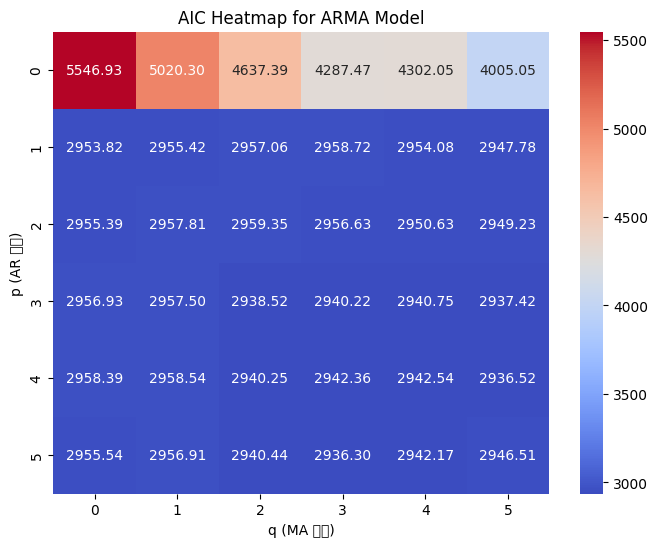

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels

📌 Training MSE: 84.3971, R²: 0.9765
📌 Test MSE: 50.6559, R²: 0.8332


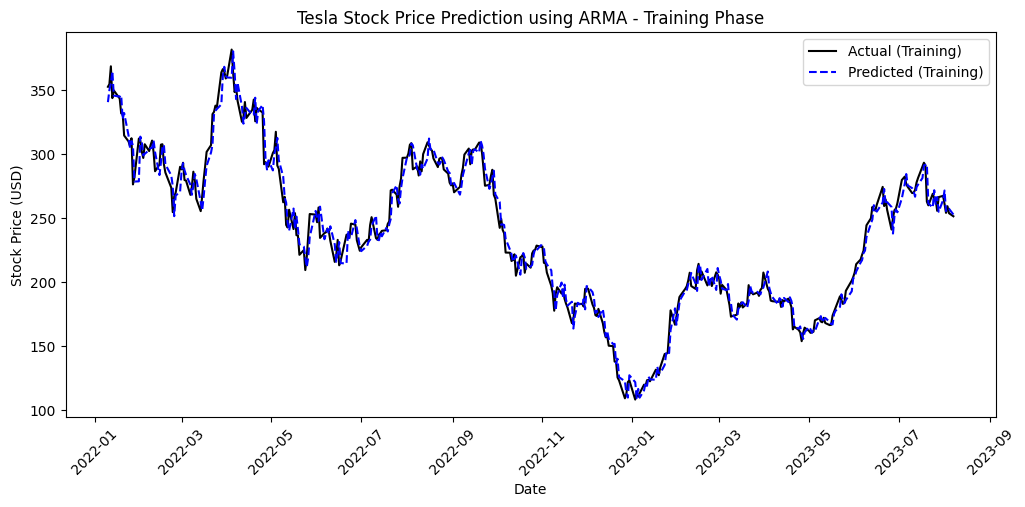

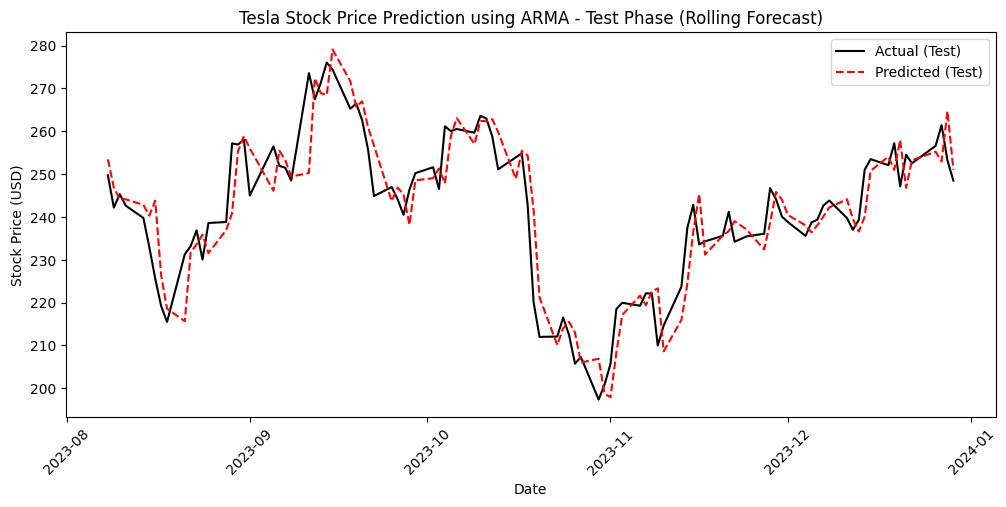

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")
df = df.reset_index()

# 📌 2️⃣ 학습 및 테스트 데이터 분할 (80% 학습, 20% 테스트)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size].copy(), df.iloc[train_size:].copy()

# 📌 3️⃣ 최적의 (p, q) 값 찾기 (AIC 기준)
pq_selection = arma_order_select_ic(train["Close"], max_ar=5, max_ma=5, ic='aic', trend='n')
best_p, best_q = pq_selection.aic_min_order
print(f"✅ 최적의 (p, q) 값: (p={best_p}, q={best_q})")

# 📌 4️⃣ AIC 결과를 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(pq_selection.aic, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=range(pq_selection.aic.shape[1]), yticklabels=range(pq_selection.aic.shape[0]))
plt.xlabel("q (MA 차수)")
plt.ylabel("p (AR 차수)")
plt.title("AIC Heatmap for ARMA Model")
plt.show()

# 📌 5️⃣ ARMA(p, q) 모델 학습
model = ARIMA(train["Close"], order=(best_p, 0, best_q))  # ✅ 차분(d=0) 사용 (ARMA 모델)
model_fit = model.fit()

# 📌 6️⃣ 훈련 데이터 예측
train_pred = model_fit.predict(start=best_p, end=len(train) - 1)

# 📌 7️⃣ 테스트 데이터 롤링 예측 (One-step forecasting)
rolling_predictions = []
history = train["Close"].squeeze().tolist()  # ✅ 해결 코드 적용

for t in range(len(test)):
    model = ARIMA(history, order=(best_p, 0, best_q))
    model_fit = model.fit()
    pred = model_fit.forecast(steps=1)
    rolling_predictions.append(pred[0])
    history.append(float(test["Close"].iloc[t]))  # ✅ float 변환 추가

# 📌 8️⃣ 성능 평가
train_actual = train["Close"][best_p:]  # 실제값
test_actual = test["Close"]

train_mse = mean_squared_error(train_actual, train_pred)
test_mse = mean_squared_error(test_actual, rolling_predictions)
train_r2 = r2_score(train_actual, train_pred)
test_r2 = r2_score(test_actual, rolling_predictions)

print(f"📌 Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"📌 Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# 📌 9️⃣ 결과 시각화 (훈련 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(train["Date"][best_p:], train_actual, label="Actual (Training)", color="black")
plt.plot(train["Date"][best_p:], train_pred, label="Predicted (Training)", color="blue", linestyle="--")
plt.title("Tesla Stock Price Prediction using ARMA - Training Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 🔟 결과 시각화 (테스트 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(test["Date"], test_actual, label="Actual (Test)", color="black")
plt.plot(test["Date"], rolling_predictions, label="Predicted (Test)", linestyle="--", color="red")
plt.title("Tesla Stock Price Prediction using ARMA - Test Phase (Rolling Forecast)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()
